In [1]:
from __future__ import print_function
import numpy as np
import argparse
import cv2
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

1816
4032
(1, 41, 3)


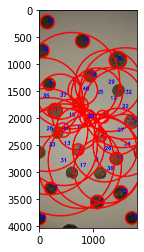

In [11]:
%matplotlib inline


import imutils
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("real/flash/coins 13.jpg", cv2.IMREAD_COLOR)

height, width, depth = img.shape
print(width)
print(height)
d = max(width, height)

maxCoordinate = 2500

if d < maxCoordinate:
    if d == width:
        img = imutils.resize(img, width = maxCoordinate)
    else:
        img = imutils.resize(img, height = maxCoordinate)

orig = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# kernel = np.ones((3,3),np.uint8)
# opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN,kernel, iterations = 2)
blur = cv2.medianBlur(gray, 7)
circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1.3, (int) (d / 15), param1 = 100, param2 = 75, minRadius = (int) (d / 50), maxRadius = (int) (d / 4))
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i, c in enumerate(circles[0, :]):
        cv2.circle(img, (c[0], c[1]), c[2], (255, 0, 0), 25)
        cv2.putText(img, str(i + 1), (c[0], c[1]), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 255), 12, cv2.LINE_AA)
plt.imshow(img)
print(circles.shape)

In [3]:
def linear_stretching(input, lower_stretch_from, upper_stretch_from):

    lower_stretch_to = 0  # lower value of the range to stretch to - output
    upper_stretch_to = 255  # upper value of the range to stretch to - output

    output = (input - lower_stretch_from) * ((upper_stretch_to - lower_stretch_to) / (upper_stretch_from - lower_stretch_from)) + lower_stretch_to

    return output

def gamma_correction(img):
    
    max_value = np.max(img)
    min_value = np.min(img)
    
    print(min_value)
    print(max_value)

    for y in range(len(img)):
        for x in range(len(img[y])):
            img[y][x] = linear_stretching(img[y][x], min_value, max_value)

    return img

2
251


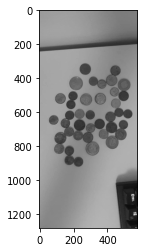

In [107]:
img = cv2.imread('real/coins 6.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = adjust_gamma(img, 2)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray = gamma_correction(gray)

plt.imshow(gray, cmap = 'gray')